In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,154 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and d

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
pop = pd.read_excel('/content/drive/My Drive/세대구성_및_거처의_종류별_가구_일반가구___시군구_20200921165029.xlsx',encoding='cp949')

In [ ]:
col = ['행정구역별(시군구)','세대구성별','일반가구','주택_계','주택_단독주택','주택_아파트','주택_연립주택','주택_다세대주택','주택_비거주용건물내 주택','주택이외의 거처_계']
pop.columns = col

In [ ]:
# 결측값 채우기
pop = pop.fillna(method='pad')

In [ ]:
sorted_pop = pop.drop(pop.index[0])

In [ ]:
# 결측값 채우기
sorted_pop = sorted_pop.replace('X',0)

In [ ]:
# 합계 구하기
sorted_pop.iloc[:,2:-1].astype('float')
sorted_pop['전체'] = sorted_pop.sum(axis=1)

In [ ]:
sorted_pop

,행정구역별(시군구),세대구성별,일반가구,주택_계,주택_단독주택,주택_아파트,주택_연립주택,주택_다세대주택,주택_비거주용건물내 주택,주택이외의 거처_계,전체
1,서울특별시,계,3896389,3627753,1047642,1668670,104007,726504,80930,268636,11420531
2,서울특별시,1세대 가구,645266,620537,151334,311053,20284,127116,10750,24729,1911069
3,서울특별시,2세대 가구,1710502,1681086,314394,964469,55781,326304,20138,29416,5102090
4,서울특별시,부부+미혼자녀,1131967,1116545,156583,714516,35463,198816,11167,15422,3380479
5,서울특별시,부+미혼자녀,85686,82458,26234,34158,2661,17883,1522,3228,253830
...,...,...,...,...,...,...,...,...,...,...,...
516,강동구,부부+미혼자녀+모친,2781,2758,473,1774,86,385,40,23,8320
517,강동구,기타,2984,2963,766,1440,98,608,51,21,8931
518,강동구,4세대 이상 가구,50,50,7,28,0,6,5,0,146
519,강동구,1인 가구,45188,39516,18661,9843,352,9253,1407,5672,129892


In [ ]:
total = sorted_pop[sorted_pop['세대구성별']=='계']
total

,행정구역별(시군구),세대구성별,일반가구,주택_계,주택_단독주택,주택_아파트,주택_연립주택,주택_다세대주택,주택_비거주용건물내 주택,주택이외의 거처_계,전체
1,서울특별시,계,3896389,3627753,1047642,1668670,104007,726504,80930,268636,11420531
21,종로구,계,62652,56548,24485,14454,5067,10796,1746,6104,181852
41,중구,계,54496,48205,14436,24015,1790,6245,1719,6291,157197
61,용산구,계,93177,86594,33846,32938,3273,15325,1212,6583,272948
81,성동구,계,122770,116171,36435,65483,1948,9353,2952,6599,361711
101,광진구,계,149905,141342,66684,31564,3925,34671,4498,8563,441152
121,동대문구,계,148349,138020,53430,62203,3060,14965,4362,10329,434718
141,중랑구,계,160776,155630,66321,50940,4273,30359,3737,5146,477182
161,성북구,계,176729,170690,58537,75856,5647,26291,4359,6039,524148
181,강북구,계,128012,124253,47260,33542,4556,36735,2160,3759,380277


In [ ]:
#조부모+미혼손자녀 (조손가정)
#부+미혼자녀 (한부모가정)
#모+미혼자녀 (한부모가정)

In [ ]:
# type(sorted_pop[sorted_pop['세대구성별']=='\u3000\u3000\u3000부+미혼자녀'])
a = sorted_pop[sorted_pop['세대구성별']=='\u3000\u3000\u3000부+미혼자녀']
b = sorted_pop[sorted_pop['세대구성별']=='\u3000\u3000\u3000모+미혼자녀']
c = sorted_pop[sorted_pop['세대구성별']=='\u3000\u3000\u3000조부모+미혼손자녀']
df = pd.concat([a,b,c])
df.reset_index()

,index,행정구역별(시군구),세대구성별,일반가구,주택_계,주택_단독주택,주택_아파트,주택_연립주택,주택_다세대주택,주택_비거주용건물내 주택,주택이외의 거처_계,전체
0,5,서울특별시,부+미혼자녀,85686,82458,26234,34158,2661,17883,1522,3228,253830
1,25,종로구,부+미혼자녀,1243,1169,511,277,103,245,33,74,3655
2,45,중구,부+미혼자녀,1215,1137,343,586,36,141,31,78,3567
3,65,용산구,부+미혼자녀,1933,1855,777,693,83,279,23,78,5721
4,85,성동구,부+미혼자녀,2784,2701,947,1407,66,217,64,83,8269
...,...,...,...,...,...,...,...,...,...,...,...,...
73,430,관악구,조부모+미혼손자녀,386,380,140,138,16,80,6,6,1152
74,450,서초구,조부모+미혼손자녀,438,434,47,313,32,33,9,0,1306
75,470,강남구,조부모+미혼손자녀,556,551,75,416,19,31,10,5,1663
76,490,송파구,조부모+미혼손자녀,563,559,87,346,15,103,8,0,1681


In [ ]:
df.loc[df['세대구성별']=='\u3000\u3000\u3000부+미혼자녀','구분'] ='한부모가정'
df.loc[df['세대구성별']=='\u3000\u3000\u3000모+미혼자녀','구분'] ='한부모가정'
df.loc[df['세대구성별']=='\u3000\u3000\u3000조부모+미혼손자녀','구분'] ='조손가정'
df_ = df.groupby(['행정구역별(시군구)','구분','전체']).sum().reset_index()
df_ = df_.loc[:,['행정구역별(시군구)','구분','전체']]
df_ = df_.iloc[:-3,:]
df_

,행정구역별(시군구),구분,전체
0,강남구,조손가정,1663
1,강남구,한부모가정,11091
2,강남구,한부모가정,41308
3,강동구,조손가정,1253
4,강동구,한부모가정,11264
...,...,...,...
70,중구,한부모가정,3567
71,중구,한부모가정,10814
72,중랑구,조손가정,1010
73,중랑구,한부모가정,13647


In [ ]:
total_per_gu = total.loc[:,['행정구역별(시군구)','전체']]
total_per_gu = total_per_gu.set_index('행정구역별(시군구)')
total_per_gu

,전체
행정구역별(시군구),
서울특별시,11420531
종로구,181852
중구,157197
용산구,272948
성동구,361711
광진구,441152
동대문구,434718
중랑구,477182
성북구,524148


In [ ]:
final = pd.merge(df_,total_per_gu,left_on="행정구역별(시군구)",right_index=True)
final['비율'] = final['전체_x'] / final['전체_y']
final

,행정구역별(시군구),구분,전체_x,전체_y,비율
0,강남구,조손가정,1663,604280,0.002752
1,강남구,한부모가정,11091,604280,0.018354
2,강남구,한부모가정,41308,604280,0.068359
3,강동구,조손가정,1253,481045,0.002605
4,강동구,한부모가정,11264,481045,0.023416
...,...,...,...,...,...
70,중구,한부모가정,3567,157197,0.022691
71,중구,한부모가정,10814,157197,0.068793
72,중랑구,조손가정,1010,477182,0.002117
73,중랑구,한부모가정,13647,477182,0.028599


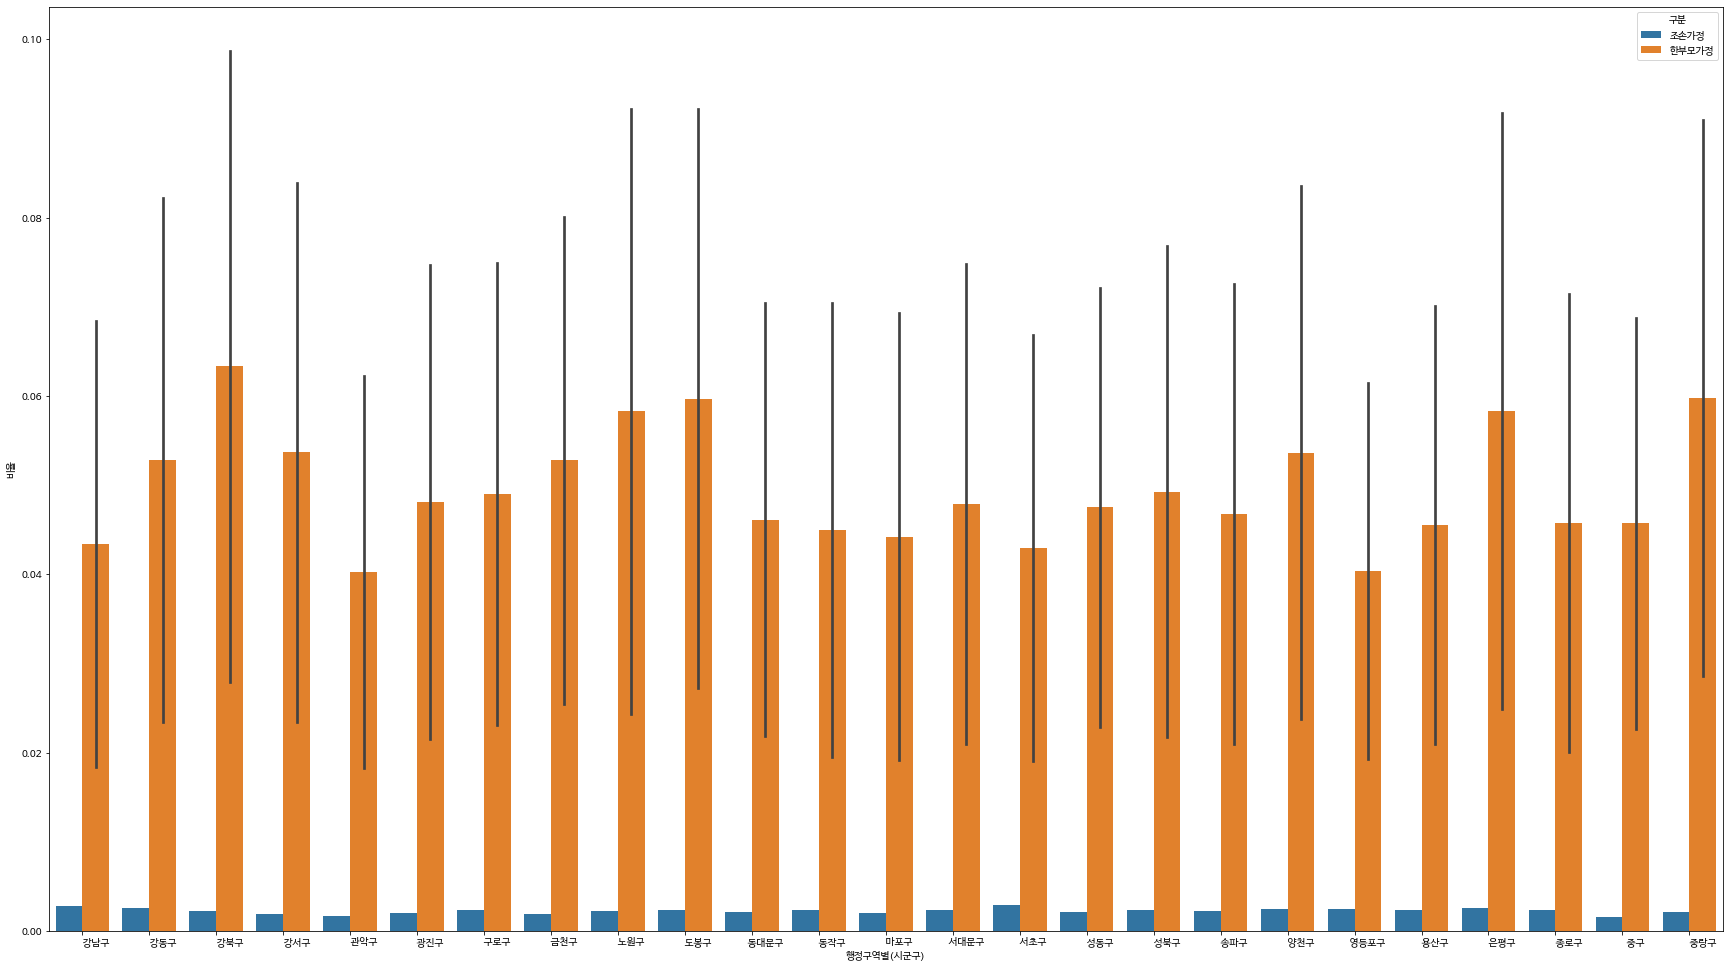

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,17))
sns.barplot(data=final,x="행정구역별(시군구)",y="비율",hue='구분')
plt.show()

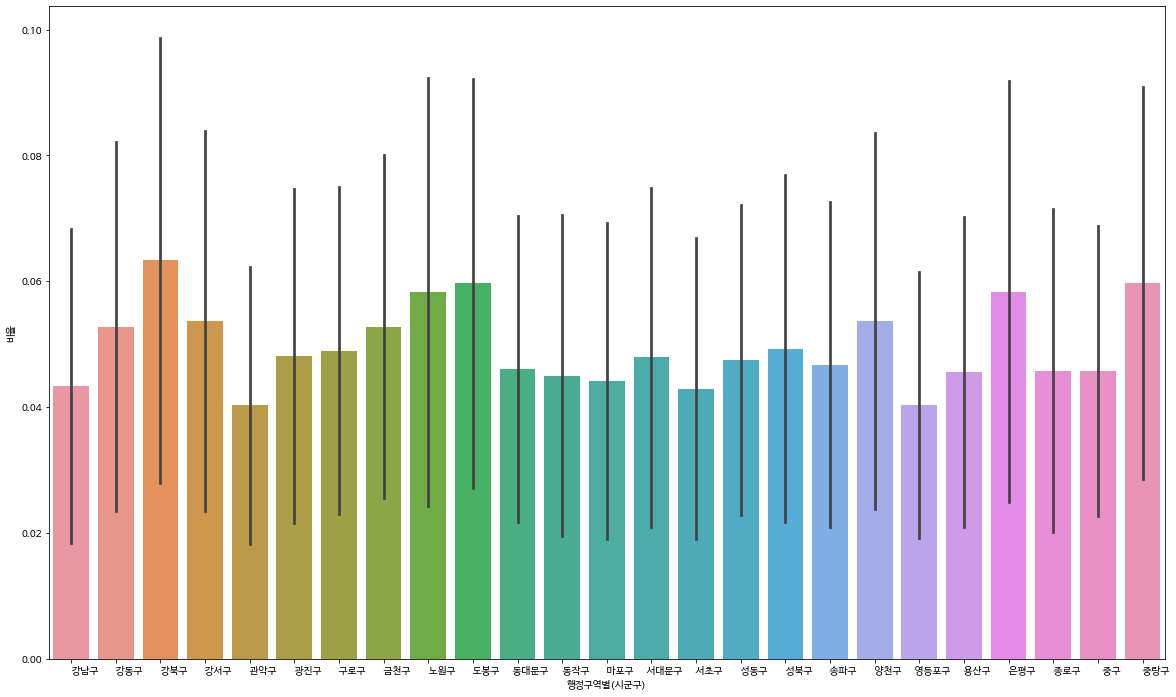

In [ ]:
# 한부모 가정
plt.figure(figsize=(20,12))
sns.barplot(data=final[final['구분']=='한부모가정'],x="행정구역별(시군구)",y="비율")
sns.color_palette("Paired")
plt.show()

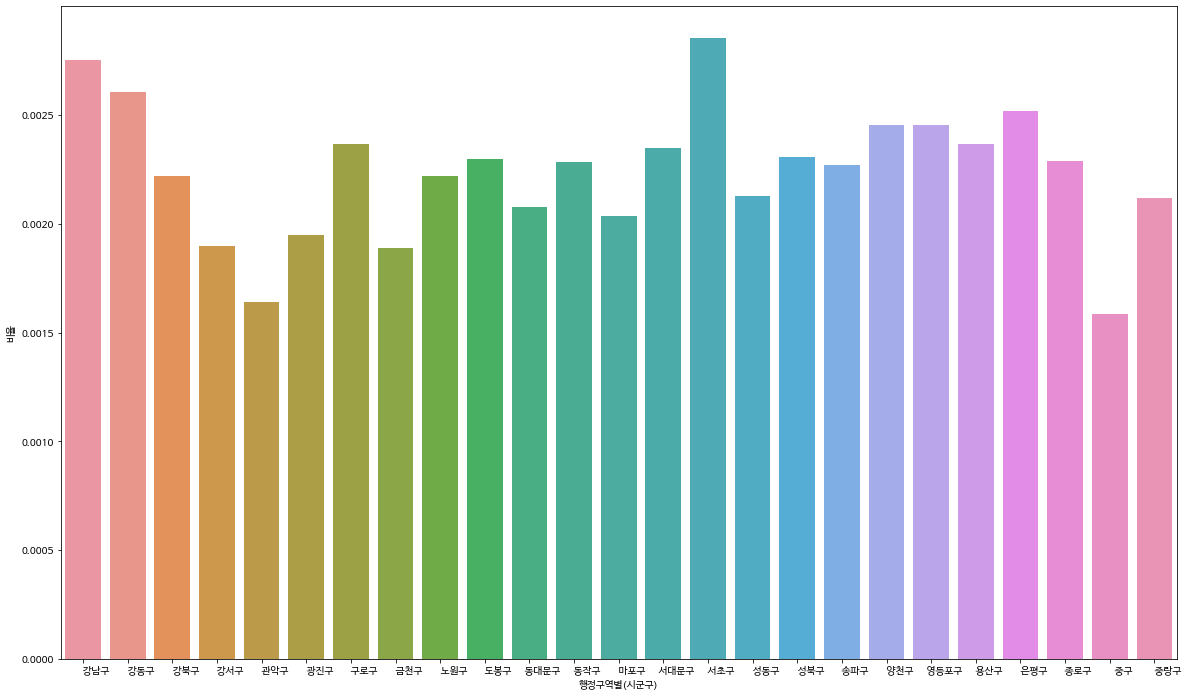

In [ ]:
# 조손가정
plt.figure(figsize=(20,12))
sns.barplot(data=final[final['구분']=='조손가정'],x="행정구역별(시군구)",y="비율")
sns.color_palette("Paired")
plt.show()

In [ ]:
# 조손/한부모 가정이 가장 적은 구
df_.groupby(by=['구분'], as_index=False).min()

,구분,행정구역별(시군구),전체
0,조손가정,강남구,249
1,한부모가정,강남구,3567


In [ ]:
# 조손/한부모 가정이 가장 많은 구
df_.groupby(by=['구분'], as_index=False).max()

,구분,행정구역별(시군구),전체
0,조손가정,중랑구,1681
1,한부모가정,중랑구,58069
